# Part I - Loan Data from Prosper
## by Narae Im

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [582]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [583]:
# Load dataset 
df = pd.read_csv('prosperLoanData.csv')

print(df.shape)

(113937, 81)


In [584]:
df.head(10)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   
5        0.1314       0.1214  ...          -25.33                0.0   
6        0.2712       0.2612  ...          -22.95                0.0   
7        0.2019       0.1919  ...          -69.21                0.0   
8        0.0629       0.0529  ...          -16.77                0.0   
9        0.0629       0.0529  ...          -16.77                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   
5                    0.0                  0.0                             0.0   
6                    0.0                  0.0                             0.0   
7                    0.0                  0.0                             0.0   
8                    0.0                  0.0                             0.0   
9                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   
5            1.0                0                          0   
6            1.0                0                          0   
7            1.0                0                          0   
8            1.0                0                          0   
9            1.0                0                          0   

  InvestmentFromFriendsAmount Investors 

In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [586]:
# Convert data type of 'ListingCreationDate' from object to datetime
pd.to_datetime(df['ListingCreationDate'])

0        2007-08-26 19:09:29.263
1        2014-02-27 08:28:07.900
2        2007-01-05 15:00:47.090
3        2012-10-22 11:02:35.010
4        2013-09-14 18:38:39.097
                   ...          
113932   2013-04-14 05:55:02.663
113933   2011-11-03 20:42:55.333
113934   2013-12-13 05:49:12.703
113935   2011-11-14 13:18:26.597
113936   2014-01-15 09:27:37.657
Name: ListingCreationDate, Length: 113937, dtype: datetime64[ns]

Since there are two columns indicating credit grade, which is **CreditGrade** and **ProsperRating (Alpha)** each, and the two columns are divided by certain time (2009), I will merge the two columns into one. 

In [587]:
pd.DatetimeIndex(df['ListingCreationDate']).year >= 2009

array([False,  True, False, ...,  True,  True,  True])

In [588]:
# merge CreditGrade and ProsperRating (Alpha) columns into one column "Rating"
def RatingSelect(df):
    if pd.DatetimeIndex(df[['ListingCreationDate']]).year < 2009 :
        return df['CreditGrade']
    elif pd.DatetimeIndex(df[['ListingCreationDate']]).year >= 2009 : 
        return df['ProsperRating (Alpha)']
    else:
        return '' 

df['Rating'] = df.apply(RatingSelect, axis=1)
df.sample(10)

ListingKey  ListingNumber            ListingCreationDate  \
40303   B43A3601034209050DDFF3D        1147565  2014-01-18 17:21:25.857000000   
106748  CFF53590005448029309220         928219  2013-09-30 05:58:45.250000000   
83969   5C5035757994089668ECC0F         745792  2013-04-07 10:27:23.323000000   
91796   53B4351230272425942DF87         499701  2011-03-28 14:26:37.177000000   
6560    9D8736010524728683BBA8C        1172979  2014-01-30 14:15:59.753000000   
31200   668A359554481443607A4F5        1020832  2013-12-01 15:32:51.990000000   
46345   E8F834682554770131AB833         434491  2009-11-20 07:55:49.350000000   
82662   9C32355277913347556D320         615999  2012-07-24 19:18:31.637000000   
97072   FA843598930614252DD3A83        1114373  2014-01-02 18:12:39.120000000   
17695   1E31359519096159740C39F        1016140  2013-11-28 20:26:01.663000000   

       CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
40303          NaN    60    Current                  NaN      0.16304   
106748         NaN    36    Current                  NaN      0.18837   
83969          NaN    36    Current                  NaN      0.14857   
91796          NaN    36  Completed  2011-06-22 00:00:00      0.35643   
6560           NaN    36    Current                  NaN      0.11599   
31200          NaN    60    Current                  NaN      0.22140   
46345          NaN    36  Completed  2012-12-04 00:00:00      0.33738   
82662          NaN    36  Completed  2012-10-11 00:00:00      0.35797   
97072          NaN    36    Current                  NaN      0.13189   
17695          NaN    36    Current                  NaN      0.20524   

        BorrowerRate  LenderYield  ...  LP_CollectionFees  \
40303         0.1400       0.1300  ...                0.0   
106748        0.1520       0.1420  ...                0.0   
83969         0.1203       0.1103  ...                0.0   
91796         0.3199       0.3099  ...                0.0   
6560          0.0879       0.0779  ...                0.0   
31200         0.1970       0.1870  ...                0.0   
46345         0.3134       0.3034  ...                0.0   
82662         0.3177       0.3077  ...                0.0   
97072         0.1039       0.0939  ...                0.0   
17695         0.1685       0.1585  ...                0.0   

        LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
40303                     0.0                  0.0   
106748                    0.0                  0.0   
83969                     0.0                  0.0   
91796                     0.0                  0.0   
6560                      0.0                  0.0   
31200                     0.0                  0.0   
46345                     0.0                  0.0   
82662                     0.0                  0.0   
97072                     0.0                  0.0   
17695                     0.0                  0.0   

        LP_NonPrincipalRecoverypayments PercentFunded  Recommendations  \
40303                               0.0        1.0000                0   
106748                              0.0        1.0000                0   
83969                               0.0        1.0000                0   
91796                               0.0        0.7127                0   
6560                                0.0        1.0000                0   
31200                               0.0        1.0000                0   
46345                               0.0        1.0000                0   
82662                               0.0        1.0000                0   
97072                               0.0        1.0000                0   
17695                               0.0        1.0000                0   

        InvestmentFromFriendsCount InvestmentFromFriendsAmount Investors  \
40303                            0                         0.0         1   
106748                           0                         0.0         1   
83969          

In [589]:
# unique values of 'rating'
df['Rating'].value_counts()

C     23989
B     19967
D     19425
A     17864
E     13084
HR    10443
AA     8880
NC      141
Name: Rating, dtype: int64

In [590]:
# Convert 'Rating' into ordered categorical types
rating_order = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_rating = pd.api.types.CategoricalDtype(ordered=True, categories=rating_order)
df['Rating'] = df['Rating'].astype(ordered_rating)

In [591]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ListingKey                           113937 non-null  object  
 1   ListingNumber                        113937 non-null  int64   
 2   ListingCreationDate                  113937 non-null  object  
 3   CreditGrade                          28953 non-null   object  
 4   Term                                 113937 non-null  int64   
 5   LoanStatus                           113937 non-null  object  
 6   ClosedDate                           55089 non-null   object  
 7   BorrowerAPR                          113912 non-null  float64 
 8   BorrowerRate                         113937 non-null  float64 
 9   LenderYield                          113937 non-null  float64 
 10  EstimatedEffectiveYield              84853 non-null   float64 
 11  

In order to compare Rating easily, I will add numeric rating values to *Rating(numeric)* column, after renaming *ProsperRating (numeric)* column, based on the newly added *Rating* column values. 

In [592]:
# change column name 
df.rename({'ProsperRating (numeric)': 'Rating(numeric)'}, axis=1, inplace=True)

In [593]:
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_CollectionFees  LP_GrossPrincipalLoss  \
0        0.1580       0.1380  ...                0.0                    0.0   
1        0.0920       0.0820  ...                0.0                    0.0   
2        0.2750       0.2400  ...                0.0                    0.0   
3        0.0974       0.0874  ...                0.0                    0.0   
4        0.2085       0.1985  ...                0.0                    0.0   

   LP_NetPrincipalLoss  LP_NonPrincipalRecoverypayments PercentFunded  \
0                  0.0                              0.0           1.0   
1                  0.0                              0.0           1.0   
2                  0.0                              0.0           1.0   
3                  0.0                              0.0           1.0   
4                  0.0                              0.0           1.0   

   Recommendations  InvestmentFromFriendsCount InvestmentFromFriendsAmount  \
0                0                           0                         0.0   
1                0                           0                         0.0   
2                0                           0                         0.0   
3                0                           0                         0.0   
4                0                           0                         0.0   

  Investors Rating  
0       258      C  
1         1      A  
2        41     HR  
3       158      A  
4        20      D  

[5 rows x 82 columns]

In [594]:
# Set Rating(Numeric) variable value based on Rating 
def set_rating_numeric(x):
    if x == 'HR':
       return 1.0
    elif x == 'E':
       return 2.0
    elif x == 'D':
       return 3.0
    elif x == 'C':
       return 4.0
    elif x == 'B':
       return 5.0
    elif x == 'A':
       return 6.0
    elif x == 'AA':
       return 7.0
    else:
       return np.nan

df['Rating(numeric)'] = df['Rating'].apply(set_rating_numeric)

In [595]:
# check 
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_CollectionFees  LP_GrossPrincipalLoss  \
0        0.1580       0.1380  ...                0.0                    0.0   
1        0.0920       0.0820  ...                0.0                    0.0   
2        0.2750       0.2400  ...                0.0                    0.0   
3        0.0974       0.0874  ...                0.0                    0.0   
4        0.2085       0.1985  ...                0.0                    0.0   

   LP_NetPrincipalLoss  LP_NonPrincipalRecoverypayments PercentFunded  \
0                  0.0                              0.0           1.0   
1                  0.0                              0.0           1.0   
2                  0.0                              0.0           1.0   
3                  0.0                              0.0           1.0   
4                  0.0                              0.0           1.0   

   Recommendations  InvestmentFromFriendsCount InvestmentFromFriendsAmount  \
0                0                           0                         0.0   
1                0                           0                         0.0   
2                0                           0                         0.0   
3                0                           0                         0.0   
4                0                           0                         0.0   

  Investors Rating  
0       258      C  
1         1      A  
2        41     HR  
3       158      A  
4        20      D  

[5 rows x 82 columns]

And let's check if there are some duplicated data. 

In [596]:
# check duplicated data 
df[df.duplicated()]

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, Rating(numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors, Rating]
Index: []

[0 rows x 82 columns]

As there are 871 rows with duplicated values, I will drop those duplicated data. 

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ListingKey                           113937 non-null  object  
 1   ListingNumber                        113937 non-null  int64   
 2   ListingCreationDate                  113937 non-null  object  
 3   CreditGrade                          28953 non-null   object  
 4   Term                                 113937 non-null  int64   
 5   LoanStatus                           113937 non-null  object  
 6   ClosedDate                           55089 non-null   object  
 7   BorrowerAPR                          113912 non-null  float64 
 8   BorrowerRate                         113937 non-null  float64 
 9   LenderYield                          113937 non-null  float64 
 10  EstimatedEffectiveYield              84853 non-null   float64 
 11  

In [598]:
# drop duplicated data 
df = df.drop_duplicates()

Also, as there are so many columns in the dataset, which is 81, it is uncomfortable to see the whole dataset in Jupyter Notebook. I will drop the columns that I don't need for this analysis. 

In [599]:
# change column name 
df.rename({'TradesNeverDelinquent (percentage)': 'TradesNeverDelinquent'}, axis=1, inplace=True)

In [600]:
df_origin = df.copy()
df = df[['LoanKey', 'Rating(numeric)', 'Rating', 'BorrowerRate', 
         'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner',
         'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'TradesNeverDelinquent', 'AmountDelinquent',
         'DebtToIncomeRatio', 'IncomeRange','StatedMonthlyIncome', 'LoanOriginalAmount'
         ]]
df.head(10)

LoanKey  Rating(numeric) Rating  BorrowerRate  \
0  E33A3400205839220442E84              4.0      C        0.1580   
1  9E3B37071505919926B1D82              6.0      A        0.0920   
2  6954337960046817851BCB2              1.0     HR        0.2750   
3  A0393664465886295619C51              6.0      A        0.0974   
4  A180369302188889200689E              3.0      D        0.2085   
5  C3D63702273952547E79520              5.0      B        0.1314   
6  CE963680102927767790520              2.0      E        0.2712   
7  0C87368108902149313D53B              4.0      C        0.2019   
8  02163700809231365A56A1C              7.0     AA        0.0629   
9  02163700809231365A56A1C              7.0     AA        0.0629   

  BorrowerState      Occupation EmploymentStatus  IsBorrowerHomeowner  \
0            CO           Other    Self-employed                 True   
1            CO    Professional         Employed                False   
2            GA           Other    Not available                False   
3            GA   Skilled Labor         Employed                 True   
4            MN       Executive         Employed                 True   
5            NM    Professional         Employed                 True   
6            KS  Sales - Retail         Employed                False   
7            CA         Laborer         Employed                False   
8            IL    Food Service         Employed                 True   
9            IL    Food Service         Employed                 True   

   CreditScoreRangeLower  CreditScoreRangeUpper  TradesNeverDelinquent  \
0                  640.0                  659.0                   0.81   
1                  680.0                  699.0                   1.00   
2                  480.0                  499.0                    NaN   
3                  800.0                  819.0                   0.76   
4                  680.0                  699.0                   0.95   
5                  740.0                  759.0                   1.00   
6                  680.0                  699.0                   0.68   
7                  700.0                  719.0                   0.80   
8                  820.0                  839.0                   1.00   
9                  820.0                  839.0                   1.00   

   AmountDelinquent  DebtToIncomeRatio     IncomeRange  StatedMonthlyIncome  \
0             472.0               0.17  $25,000-49,999          3083.333333   
1               0.0               0.18  $50,000-74,999          6125.000000   
2               NaN               0.06   Not displayed          2083.333333   
3           10056.0               0.15  $25,000-49,999          2875.000000   
4               0.0               0.26       $100,000+          9583.333333   
5               0.0               0.36       $100,000+          8333.333333   
6               0.0               0.27  $25,000-49,999          2083.333333   
7               0.0               0.24  $25,000-49,999          3355.750000   
8               0.0               0.25  $25,000-49,999          3333.333333   
9               0.0               0.25  $25,000-49,999          3333.333333   

   LoanOriginalAmount  
0                9425  
1               10000  
2                3001  
3               10000  
4               15000  
5               15000  
6                3000  
7               10000  
8               10000  
9               10000

### What is the structure of your dataset?

> This data set contains 113,937 loan data with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. As there are 871 rows with duplicated values, after droping those rows, there are 113,066 data in total.    
> Most variables are numeric in nature, but the variables BorrowerState, Occupation, and EmploymentStatus are objects.    
>CreditGrade and ProsperRating (Alpha) are ordered factor variables with the following levels.
>
>(worst) ——> (best)   
>0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  



### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the Credit Grade(Rating) in the dataset.   

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that each borrowers Monthly Income, DebtToIncomeRatio, and Employment status will have the strongest effect on CreditGrade: the higher the income and the lower the DebtToIncomeRatio and the more stable the employment status, the greater grades of rating. I also think that the other informations regarding the borrower such as State, Occupation, Is borrower home owner etc. will have effects on the credit grade. 
>
>
> The main features that I will investigate are :   
> CreditGrade and ProsperRating (Alpha) / BorrowerRate / EnploymentStatus / Additional information about the borrower (incl. State, Occupation, Income, Home Owner etc.)

## Univariate Exploration

### Credit Rating

I'll start by looking at the distribution of the main variable of interest: Rating.

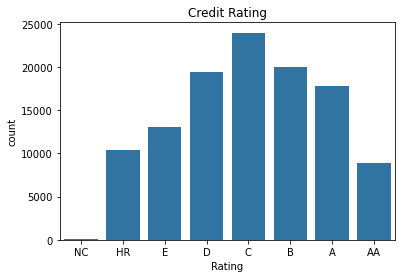

In [601]:
# plotting
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='Rating', color=base_color);
plt.title('Credit Rating');

### Stated Monthly Income

Next up, the first predictor variable of interest: *StatedMonthlyIncome*.

In [602]:
df.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

As there are too many decimal values in *StatedMonthlyIncome*, it is difficult to see the numbers. I will convert the values into *int* dtype and make a new column called *StatedMonthlyIncomeI*.

In [603]:
df['StatedMonthlyIncomeI'] = df.StatedMonthlyIncome.astype('int64')

In [604]:
df.head()

LoanKey  Rating(numeric) Rating  BorrowerRate  \
0  E33A3400205839220442E84              4.0      C        0.1580   
1  9E3B37071505919926B1D82              6.0      A        0.0920   
2  6954337960046817851BCB2              1.0     HR        0.2750   
3  A0393664465886295619C51              6.0      A        0.0974   
4  A180369302188889200689E              3.0      D        0.2085   

  BorrowerState     Occupation EmploymentStatus  IsBorrowerHomeowner  \
0            CO          Other    Self-employed                 True   
1            CO   Professional         Employed                False   
2            GA          Other    Not available                False   
3            GA  Skilled Labor         Employed                 True   
4            MN      Executive         Employed                 True   

   CreditScoreRangeLower  CreditScoreRangeUpper  TradesNeverDelinquent  \
0                  640.0                  659.0                   0.81   
1                  680.0                  699.0                   1.00   
2                  480.0                  499.0                    NaN   
3                  800.0                  819.0                   0.76   
4                  680.0                  699.0                   0.95   

   AmountDelinquent  DebtToIncomeRatio     IncomeRange  StatedMonthlyIncome  \
0             472.0               0.17  $25,000-49,999          3083.333333   
1               0.0               0.18  $50,000-74,999          6125.000000   
2               NaN               0.06   Not displayed          2083.333333   
3           10056.0               0.15  $25,000-49,999          2875.000000   
4               0.0               0.26       $100,000+          9583.333333   

   LoanOriginalAmount  StatedMonthlyIncomeI  
0                9425                  3083  
1               10000                  6125  
2                3001                  2083  
3               10000                  2875  
4               15000                  9583

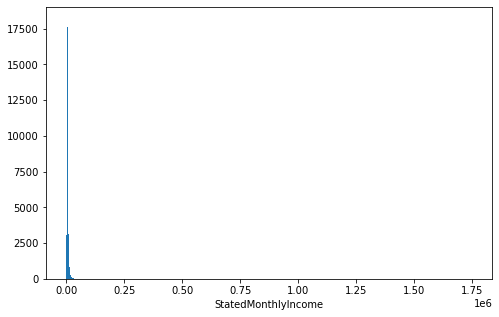

In [605]:
# plotting StatedMonthlyIncome on a standard scale
binsize = 1000
bins = np.arange(0, df['StatedMonthlyIncomeI'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'StatedMonthlyIncomeI', bins = bins)
plt.xlabel('StatedMonthlyIncome')
plt.show()

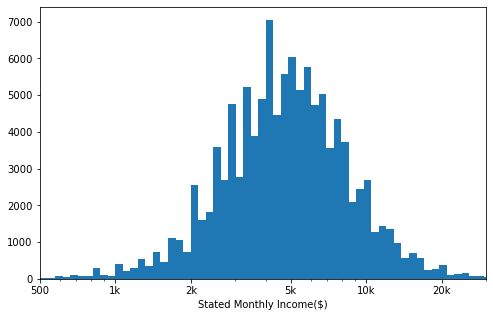

In [606]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.03
bins = 10 ** np.arange(0, np.log10(df['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xlim([500,3e4])
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Stated Monthly Income($)')
plt.show()

Stated Monthly Income($) has a long-tailed distribution, with a lot of income on the low end, and few on the high end. When plotted on a log-scale, the income distribution looks roughly unimodal, with one peak between 3k - 7k.   

### Debt To Income Ratio

Next up, the second predictor variable of interest: DebtToIncomeRatio.

In [607]:
df.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

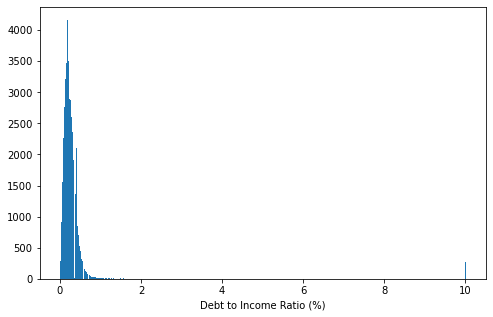

In [608]:
# Plotting DebtToIncomeRatio
binsize=0.01
bins = np.arange(0, df['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8,5])
plt.hist(data=df, x='DebtToIncomeRatio', bins=bins)
plt.xlabel('Debt to Income Ratio (%)')
plt.show()

As most of values seem to be in between 0 and 1, I will re-plot the DebtToIncomeRatio with x limitation of 0-1.

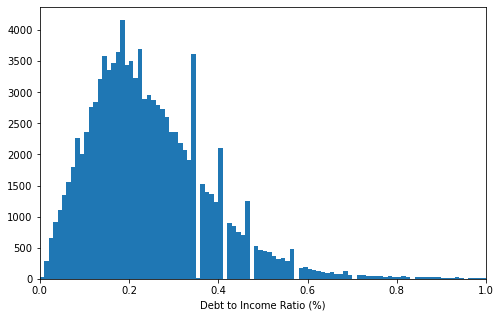

In [609]:
# re-plot with xlim values 0-1
binsize=0.01
bins = np.arange(0, df['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8,5])
plt.hist(data=df, x='DebtToIncomeRatio', bins=bins)
plt.xlim([0,1]) # limit the x axis
plt.xlabel('Debt to Income Ratio (%)')
plt.show()

There's a long tail in the distribution of the Debt to Income Ratio (%). Most of values are between 0.1 - 0.3 and only few values are greater than 0.5. 

### Income Range

Next up, the third predictor variable of interest: IncomeRange.  
In order to plot *IncomeRange* which is ordinal variable, I need to change the dtypes of *IncomeRange* from object to category. 

In [610]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

"Not Employed" is actually same as "$0", so I will replace the values. 

In [611]:
# replace "Not Employed" as "$0"
df['IncomeRange'].replace(['Not employed'], '$0', inplace = True)

In [612]:
income_range = ['Not displayed','$0','$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordered_income = pd.api.types.CategoricalDtype(ordered = True, categories = income_range)
df['IncomeRange'] = df['IncomeRange'].astype(ordered_income)

In [613]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
$0                 1427
Name: IncomeRange, dtype: int64

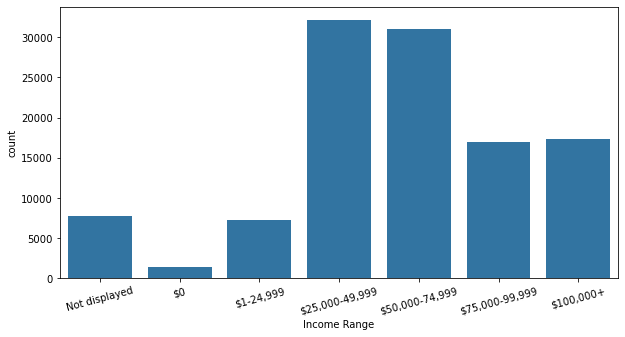

In [614]:
# plotting IncomeRange
default_color = sb.color_palette()[0]

plt.figure(figsize=[10,5])
sb.countplot(data = df, x = 'IncomeRange', color = default_color)
plt.xticks(rotation=15)
plt.xlabel('Income Range')
plt.show()

If you see above bar chart, the most common income range was \\$25,000 ~\\$75,000. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> StatedMonthlyIncome variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked unimodal, with one peak between  between \\$3,000 - \\$7,000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the DebtToIncomeRatio variables, a number of outlier points were identified. Overall, these points can be characterized by very low income which is \\$0 or Not Employed. So when plotting, I used xlim method to limit the x axis values range as 0 to 1. 

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [615]:
numeric_vars = ['Rating(numeric)', 'BorrowerRate', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'TradesNeverDelinquent', 'AmountDelinquent', 'DebtToIncomeRatio','StatedMonthlyIncome', 'LoanOriginalAmount']
categoric_vars = ['LoanStatus', 'Rating', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange']

### Quantitative vs Quantitative

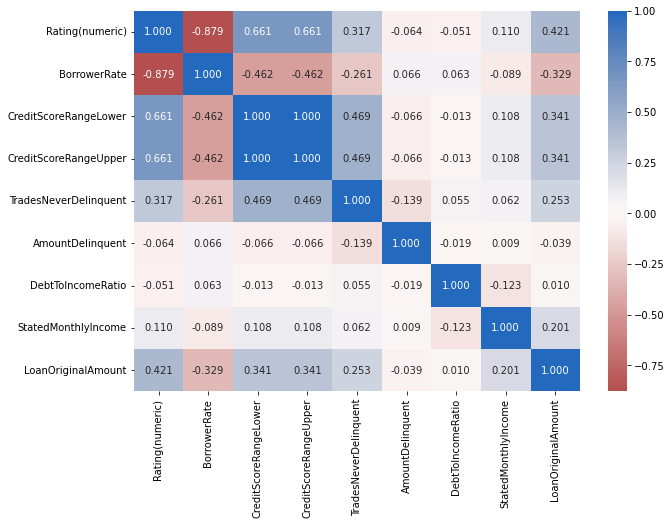

In [616]:
# correlation plot
plt.figure(figsize = [10, 7])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

If you see the above heatmap, Rating(numeric) has a strong positive correlation with CreditScoreRangeLower, CreditScoreRangeUpper and a strong negative correlation with BorrowerRate. Also it has a positive correlation with TradesNeverDelinquent and LoanOriginAmount. 

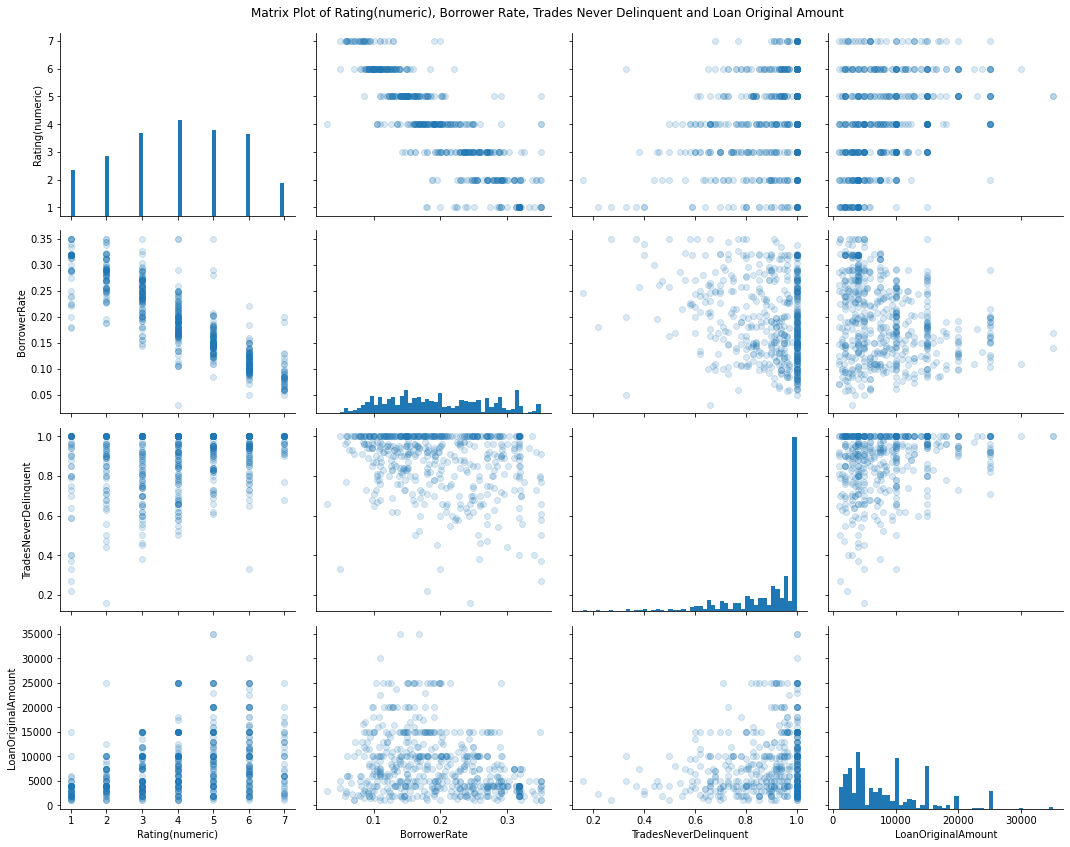

In [617]:
# plot matrix: sample 0.5% of data so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], int(df.shape[0]*.005), replace = False)
df_samp = df.loc[samples,:]

# pair grid
g = sb.PairGrid(data = df_samp, vars = ['Rating(numeric)','BorrowerRate', 'TradesNeverDelinquent', 'LoanOriginalAmount'], height = 3, aspect = 1.25)
g = g.map_diag(plt.hist, bins = 50)
g.map_offdiag(plt.scatter, alpha = 1/6)

g.fig.suptitle('Matrix Plot of Rating(numeric), Borrower Rate, Trades Never Delinquent and Loan Original Amount')
g.fig.subplots_adjust(top = .95);

If you see the *Rating(numeric)* variable, Borrower Rate seems lower with greater Rating, and higher with lower Rating.    

Also you can see that most of data with higher Rating has less possibility of delinquencies. The greater the possibility of delinquencies, the lower the Rating. 

Seeing Loan Original Amount, as predicted, the loan amount was smaller with lower Rating, however, with the higher Rating, the total loan amount was greater. 

### Quantitative vs. Qualitative

Next, I will take a look at how a debt to income ratio and stated monthly income relates to the credit rating.

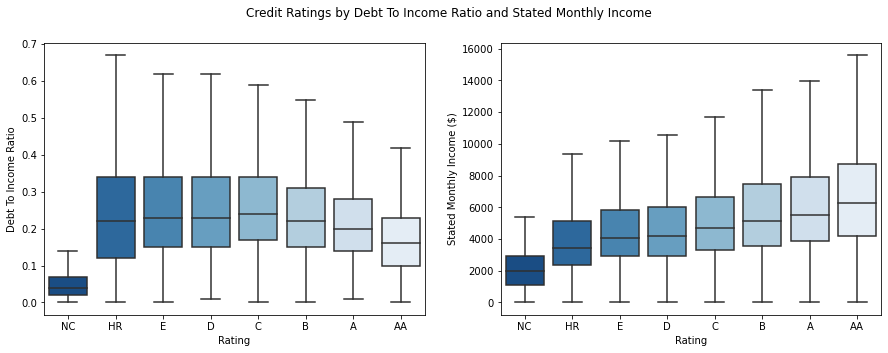

In [618]:
# boxplots
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.boxplot(data = df, y = 'DebtToIncomeRatio', x = 'Rating', palette = "Blues_r", showfliers = False)
plt.ylabel('Debt To Income Ratio')
plt.xlabel('Rating')

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.boxplot(data = df, y = 'StatedMonthlyIncome', x = 'Rating', palette = "Blues_r", showfliers = False)
plt.ylabel('Stated Monthly Income ($)')
plt.xlabel('Rating')

plt.suptitle('Credit Ratings by Debt To Income Ratio and Stated Monthly Income');

From the first boxplot, I can say that the boundary of *Debt To Income Ratio* is getting smaller as *Rating* increases. We can see that with "AA" Rating, the *Debt To Income Ratio* is between 0 - 0.45, whereas with "HR" Rating, the ratio is from 0 - 0.7. 

Also, when looking at the next boxplot, as *Rating* increases, *Stated Monthly Income ($)* is also increasing. The median value is not significantly different among *Rating*, but the overall income range differs. For example, in "HR" rating, the monthly income range is from 0 to 10000 whereas in "AA", the income range is 0 to 16000.

So, I can guess that as Debt to Income Ratio decreases, the loan amount compared to income decreases, so the rating score for the loan increases.
Also as income increases, the ability to pay the loan also increases, so the rating score for the loan also increases. 

In the first boxplot, it's interesting to see that the width and whiskers of the boxplots shrink as credit rating increases. This suggests that with high rating, the ratio of debt to income is smaller than the low rating. Also in the second boxplot, the opposite pattern is shown. As rating increses, the width and whisker of the boxplots expands. That means that it is more likely to have higher monthly income with greater credit rating. 

### Qualitative vs. Qualitative

Let's continue to plot the credit score along with the income range.

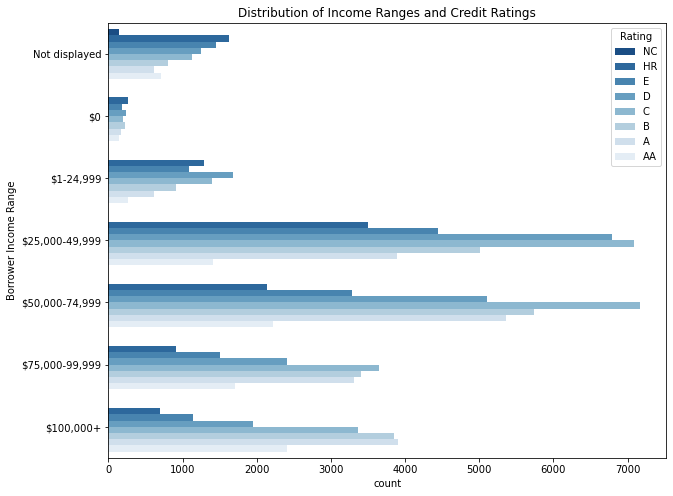

In [619]:
# clustered bar chart
plt.figure(figsize = [10,8])

ax = sb.countplot(data = df, y = 'IncomeRange', hue = 'Rating',
                   palette = 'Blues_r')

ax.legend(title = 'Rating')
plt.title('Distribution of Income Ranges and Credit Ratings')
plt.ylabel('Borrower Income Range');

From the above clustered bar chart, I can see the higher incomes correlate to a higher credit rating. For example, in income range of \\$1 - 24,999, the lower rating("NC", "HR") is relatively more frequent than the higer ratings("A", "AA"). On the contrary, in a range of \\$75,000+, the higer ratings("A", "AA") is more frequent than the lower rating("NC", "HR") in proportion. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the correlation heatmap, the numerical features of my interest did not reveal any significant correlation. It was beyond my expectation to see that there was very weak correlation between debt to income ratios, stated monthly income, and credit rating.
>
> However, from the box plots, I found significant correlation between debt to income ratio, stated monthly income and rating. I could see that the median debt to income ratio decreases and the median monthly income increasess as the rating increases. I can guess that with a lower debt to income ratio could mean that the debt ratio compared to income is low, and that leads to the greater rating. Also with a higher monthly income, the rating was relatively higher as well in that the higher income can guarantee that the borrower can pay off the loan with stability. 
>
> From the clustered bar chart, I looked at credit ratings and income ranges. This revealed that the high income is related to better credit ratings. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> From the correlation heatmap, I observed that Rating(numeric) has a strong positive correlation with CreditScoreRangeLower, CreditScoreRangeUpper and a strong negative correlation with BorrowerRate. Also I found out that the Rating has a positive correlation with TradesNeverDelinquent and LoanOriginAmount variables as well. 

## Multivariate Exploration


The main thing I want to explore in this part of the analysis is how the two variables of interest, which is StatedMonthlyIncome and EmploymentStatus affect the credit Rating. 

In [620]:
# Convert 'EmploymentStatus' into ordered categorical types
employmentstatus_order = ['Not Available', 'Not Employed', 'Other', 'Part-time', 'Self-employed', 'Employed', 'Full-time', 'Retired']
ordered_employmentstatus = pd.api.types.CategoricalDtype(ordered=True, categories=employmentstatus_order)
df['EmploymentStatus'] = df['EmploymentStatus'].astype(ordered_employmentstatus)

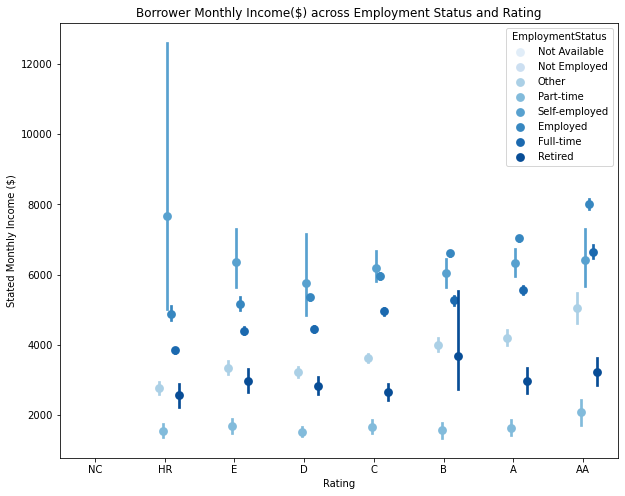

In [621]:
fig = plt.figure(figsize = [10,8])
ax = sb.pointplot(data = df, x = 'Rating', y = 'StatedMonthlyIncome', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Borrower Monthly Income($) across Employment Status and Rating')
plt.ylabel('Stated Monthly Income ($)')
plt.show();

First, I looked into Borrower Monthly Income($) across Employment Status and Rating. As shown in above plot, employment status has differences among ratings. In higer rating, such as "AA" and "A", "Retired" and "Full time" status were frequent, whereas in lower rating, such as "HR" and "E", "Part time" status was most frequent. I can guess that this tendency came from the general concept that more employment stability can guarantee the higher ability of repaying the loan. 

Also, if you see the relationship with stated monthly income($) and Employment status, in more stable employment status such as "Full time" and "Employed" has higher monthly income, whereas in less stable employment status such as "Part-time" and "Other", the monthly income was low. 

Interesting point was that the borrowers who are in "Self-employed" status, credit rating was relatively low despite of the fact that the stated monthly income was very high.

Next, I want to explore how the DebtToIncomeRatio and EmploymentStatus variable affects the credit Rating.

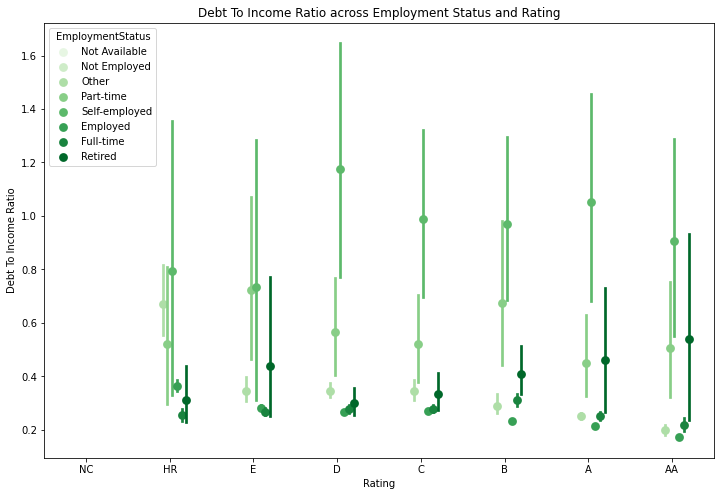

In [622]:
fig = plt.figure(figsize = [12,8])
ax = sb.pointplot(data = df, x = 'Rating', y = 'DebtToIncomeRatio', hue = 'EmploymentStatus',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Debt To Income Ratio across Employment Status and Rating')
plt.ylabel('Debt To Income Ratio')
plt.show();

In the above plot, I looked into Debt To Income Ratio across Employment Status and Rating.   

Similarly, as the rating increases, the employment status were more stable. "Retired" and "Full time" status was more frequent in higher ratings, whereas "Part-time" and "Other" status was more frequent in lower ratings. 

In debt to Income Ratio, significant diffrence between rating was not found, but among the employment status, normally less stable status such as "Part-time" and "Self-employed" has higer debt to income ratio. On the other way, in more stable employment status such as "Full-time" and "Employed", the debt to income ratio was relatively low. 

Next, I will use heat maps to figure out relationships with Rating, BorrowerRate, and StatedMonthlyIncome. 

In [623]:
# make function for creating heat maps 
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 20000+1000, 1000)
    bins_y = np.arange(0, df.BorrowerRate.max()+0.05, 0.05)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

Next, I will use heat maps to figure out relationships with Rating, BorrowerRate, and StatedMonthlyIncome. 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


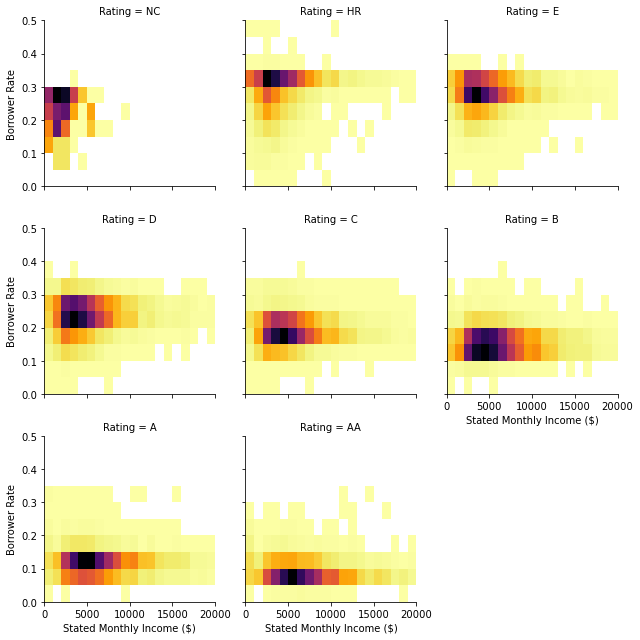

In [624]:
# create faceted heat maps on levels of the Rating variable
g = sb.FacetGrid(data = df, col = 'Rating', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'StatedMonthlyIncome', 'BorrowerRate', color = 'inferno_r')
g.set_xlabels('Stated Monthly Income ($)')
g.set_ylabels('Borrower Rate')

plt.show()

If you see the above heat maps, you can see that as rating increases, the borrower rate decreases. For example, in "HR" rating, the borrower rate was 0.35 on average but in "AA" rating, the average borrower rate was below 0.1. 

Also, looking at the relationship between stated monthly income and rating, it seems that in lower rating, monthly income is relatively low compared to the higher rating. 

Then I will figure out relationships with Occupation, BorrowerRate, and StatedMonthlyIncome. 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


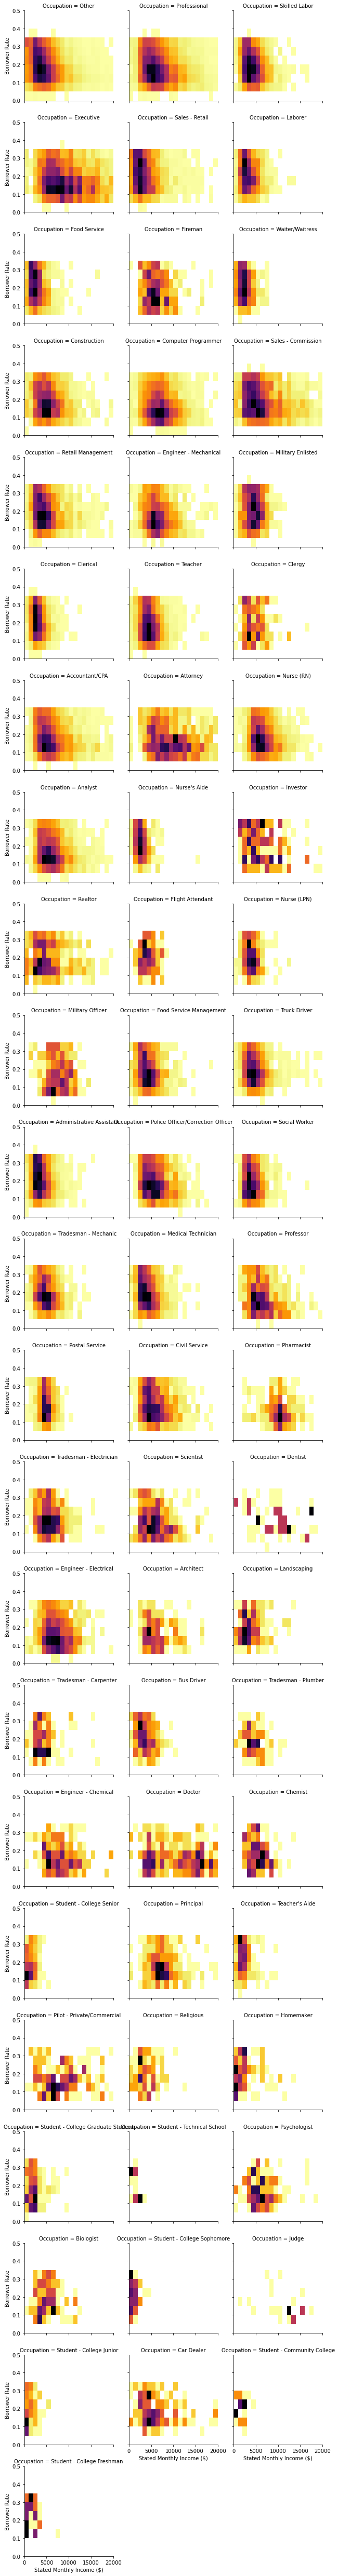

In [625]:
# create faceted heat maps on levels of the Occupation variable
g = sb.FacetGrid(data = df, col = 'Occupation', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'StatedMonthlyIncome', 'BorrowerRate', color = 'inferno_r')
g.set_xlabels('Stated Monthly Income ($)')
g.set_ylabels('Borrower Rate')

plt.show()

Finally, I looked into Borrower Rate across Stated Monthly Income and Occupation.  

Predictably, the students are the ones that has the lowest monthly income and and the highest borrower rate. On the other hand, doctors and attorneys are the ones that has the highest monthly income and low borrower rate. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> First, I looked into Borrower Monthly Income($) across Employment Status and Rating. Employment status has differences among ratings. As the rating increases, the employment status was more stable. I can guess that this tendency came from the general concept that more employment stability can guarantee the higher ability of repaying the loan. 
Interesting point was that the borrowers who are in "Self-employed" status, credit rating was relatively low despite of the fact that the stated monthly income was very high.
>
>Next, I plotted Debt To Income Ratio across Employment Status and Rating.
In debt to Income Ratio, significant diffrence between rating was not found, but among the employment status, normally less stable status such as "Part-time" and "Self-employed" has higer debt to income ratio. On the other way, in more stable employment status such as "Full-time" and "Employed", the debt to income ratio was relatively low.

## Conclusions

I was most interested in figuring out what features are best for predicting the Credit Grade(Rating) in the dataset.   

I expected that each borrowers Monthly Income, DebtToIncomeRatio, and Employment status will have the strongest effect on CreditGrade: the higher the income and the lower the DebtToIncomeRatio and the more stable the employment status, the greater grades of rating. 

In univariate exploration, I looked into Rating, DebtToIncome Ratio, Stated Monthly Income and Income range variables.

In bivariate exploration, from the correlation heat map, I found out that Rating(numeric) has a strong positive correlation with CreditScoreRangeLower, CreditScoreRangeUpper and a strong negative correlation with BorrowerRate. 

Also I looked into Credit Ratings by Debt To Income Ratio and Stated Monthly Income using box plots. 
I could guess that as Debt to Income Ratio decreases, the loan amount compared to income decreases, so the rating score for the loan increases. Also as income increases, the ability to pay the loan also increases, so the rating score for the loan also increases.

Next, I plotted Distribution of Income Ranges and Credit Ratings and found out that the higher incomes correlate to a higher credit rating. 

In multivariate exploration, I plotted Borrower Monthly Income($) across Employment Status and Rating. Interesting point was that the borrowers who are in "Self-employed" status, credit rating was relatively low despite of the fact that the stated monthly income was very high.

Also I looked into Debt To Income Ratio across Employment Status and Rating and found out that similarly, as the rating increases, the employment status were more stable. 

In final steps, I used heat maps to figure out the relationships with Rating, BorrowerRate, and StatedMonthlyIncome / Occupation, BorrowerRate, and StatedMonthlyIncome.  

I found out that as rating increases, the borrower rate decreases and it seems that in lower rating, monthly income is relatively low compared to the higher rating.    

In regards of Occupation, the students are the ones that has the lowest monthly income and and the highest borrower rate. On the other hand, doctors and attorneys are the ones that has the highest monthly income and low borrower rate.